<a href="https://colab.research.google.com/github/Kent7474/Proyecto_Seminario/blob/v2/An%C3%A1lisis_de_activos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT DE LIBRERÍAS

In [332]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Frameworks principales
import pandas as pd
import numpy as np

# from pandas_datareader import data as pdr #No está funcionando
import yfinance as yf

# Frameworks secundarios
from datetime import datetime
from datetime import timedelta
    # Visualización
import matplotlib.pyplot as plt
import statistics
import seaborn as sns




In [333]:
pd.options.display.max_columns = 50
pd.set_option('display.max_colwidth', 15)


# DEFINICIÓN DE ACTIVOS Y FECHAS

## Periodos - Fecha inicio y fin

In [334]:
 #  YYYY-mm-dd
fechaInicio = "2020-01-01"
#today = "2022-11-01"
today = datetime.today().strftime('%Y-%m-%d')

In [335]:
#activos = ["AAPL", "MSFT", "AMZN", "GOOGL", "ENPH", "META", "PEP", "TSLA", "V", "CAR", "TTD", "AMGN", "AAL", "TMUS", "CPRX", "ICPT"]
#activos = ["AAPL", "MSFT", "AMZN", "GOOGL", "META", "TSLA", "V"]
#activos = ["RIOT", "WKHS", "SPCE", "OSTK", "TSLA", "PLUG", "ZM", "QS", "BYND", "XPEV"]
#activos = ["RIOT", "WKHS", "SPCE", "OSTK", "TSLA", "PLUG", "ZM", "QS", "BYND", "XPEV", "AAPL", "MSFT", "AMZN", "GOOGL", "FB", "JNJ", "V", "DIS", "PFE", "KO"]

''' NASDAQ, más rendimiento a mayor riesgo'''
activos = ["AMD","LCID", "MNST", "BIIB", "NVDA", "ADBE", "NFLX", "INTC"] # ESTAAAA

#activos = ["AMD","LCID", "MNST", "BIIB", "NVDA", "ADBE", "NFLX", "INTC", "HON","GFS", "FISV", "FAST", "EXC", "CSX", "CRWD", "COST", "MELI", "META", "MRVL", "MAR", "LULU", "HON", "GFS" ]
#activos = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'JNJ', 'PG', 'V', 'JPM', 'KO', 'PEP', 'XOM', 'CVX', 'T', 'VZ', 'INTC', 'CSCO', 'ADBE', 'CRM', 'ABT', 'AMGN', 'UNH', 'PFE', 'MRK', 'BMY', 'RTX', 'LMT', 'GS', 'MA']


''' Excel facu '''
#activos = ['FNKO', 'PEP', 'MCD', 'SONY', 'DIS', 'CMCSA', 'NTDOY', 'CCOEY', 'MDLZ', 'GME']

'''Excel práctica en clase '''
#activos = ['TSLA', 'META', 'AAPL', 'AMZN', 'NFLX']

len(activos)

8

# DESCARGA Y VISUALIZACIÓN DE RENDIMIENTOS.
(Columna 'Adj Close') desde Yahoo Finance.

In [336]:
''' Con la función yf.download descargamos los rendimientos de cada activo
    según las fechas dadas (fechaInicio y today). De todas las columnas que
    nos trae, nos quedamos con 'Adj Close' '''
dataSet = yf.download(activos, start=fechaInicio, end=today)['Adj Close']
#dataSet = yf.download(activos, start=fechaInicio, end=today, interval='1mo')['Adj Close']

''' Revisamos los primero y los últimos 3 registros del DataFrame,
     para asegurarnos que tenga datos.'''
display(dataSet)
pd.DataFrame(dataSet).to_excel("DataSet.xlsx")
#display(dataSet.head(3))
#display(dataSet.tail(3))

[*********************100%***********************]  8 of 8 completed


,ADBE,AMD,BIIB,INTC,LCID,MNST,NFLX,NVDA
Date,,,,,,,,
2020-01-02,334.429993,49.099998,294.239990,54.760345,NaN,31.850000,329.809998,59.754215
2020-01-03,331.809998,48.599998,290.850006,54.094288,NaN,31.639999,325.899994,58.797791
2020-01-06,333.709991,48.389999,290.820007,53.941280,NaN,31.690001,335.829987,59.044373
2020-01-07,333.390015,48.250000,290.089996,53.041206,NaN,31.844999,330.750000,59.759197
2020-01-08,337.869995,47.830002,292.660004,53.077209,NaN,31.910000,339.260010,59.871281
...,...,...,...,...,...,...,...,...
2023-06-16,495.179993,120.080002,297.480011,36.369999,6.48,58.450001,431.959991,426.920013
2023-06-20,485.859985,118.930000,293.790009,35.000000,6.32,58.360001,434.700012,438.079987
2023-06-21,477.480011,112.110001,294.359985,32.900002,6.05,58.410000,424.450012,430.450012


In [337]:
dataSet.max()

ADBE    688.369995
AMD     161.910004
BIIB    414.709991
INTC     63.348763
LCID     58.049999
MNST     59.939999
NFLX    691.690002
NVDA    438.079987
dtype: float64

### Gráfico de precios de períodos

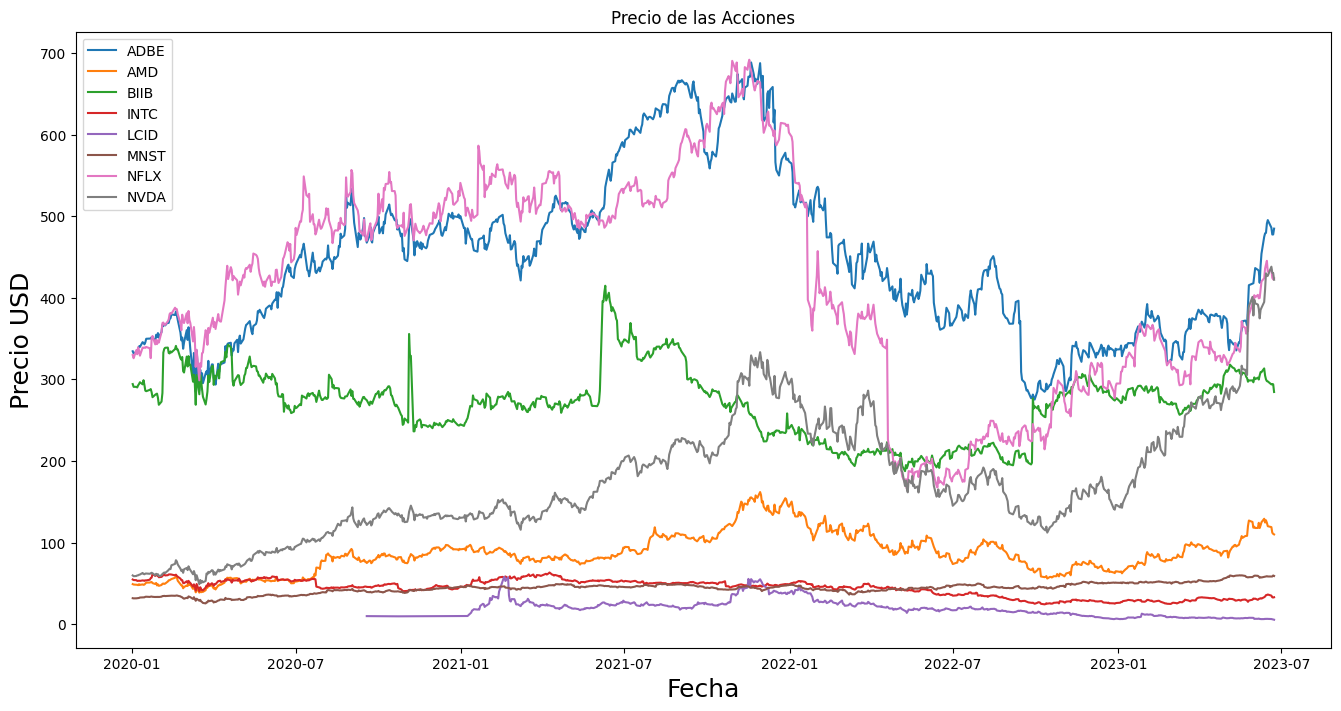

In [338]:
plt.figure(figsize=(16.2, 8))
for i in dataSet.columns.values:
    plt.plot(dataSet[i], label=i)
plt.title('Precio de las Acciones')
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Precio USD', fontsize=18)
plt.legend(dataSet.columns.values, loc='upper left')
plt.savefig('plotprecios.png', dpi=200, bbox_inches='tight')
plt.show()


### Calculamos el rendimiento de cada acción con el periodo anterior

In [339]:
''' Divide el valor de cada columna (df) por la columna anterior (df.shift(1))
    Luego le resta -1 para obtener el rendimiento.'''
rendimiento = (dataSet / dataSet.shift(1) -1).dropna()
rendimiento.head() * 100

,ADBE,AMD,BIIB,INTC,LCID,MNST,NFLX,NVDA
Date,,,,,,,,
2020-09-21,1.730302,4.017085,-2.251539,-0.340735,-0.303344,-0.772250,3.700318,2.690898
2020-09-22,2.342104,-0.307936,1.662327,0.462566,0.202844,1.084468,0.783832,0.962691
2020-09-23,-3.367021,-3.822386,-0.205308,-2.262262,-0.303641,-1.817496,-4.185929,-4.067185
2020-09-24,-0.578244,1.458579,-0.793535,0.696457,-0.812182,0.269956,0.524851,1.849686
2020-09-25,2.589430,2.954363,1.199819,1.586657,0.409416,1.012822,2.071535,4.257765


### Calculo de esperanza, varianza y desvío estandar

In [340]:
esp_var_desv = pd.DataFrame(rendimiento.mean() *100, columns=["Esperanza"])

esp_var_desv = esp_var_desv.T
esp_var_desv = esp_var_desv.append(pd.DataFrame(rendimiento.var(ddof=0), columns=["Varianza"]).T)
esp_var_desv = esp_var_desv.append(pd.DataFrame(rendimiento.std(ddof=0)*100, columns=["STD"]).T)
esp_var_desv

,ADBE,AMD,BIIB,INTC,LCID,MNST,NFLX,NVDA
Esperanza,0.032809,0.107900,0.057680,-0.020874,0.095223,0.069713,0.038880,0.236974
Varianza,0.000545,0.001053,0.001172,0.000517,0.003707,0.000232,0.001015,0.001167
STD,2.334176,3.245438,3.423606,2.273607,6.088199,1.523349,3.185473,3.415697


### Distribución de rendimientos

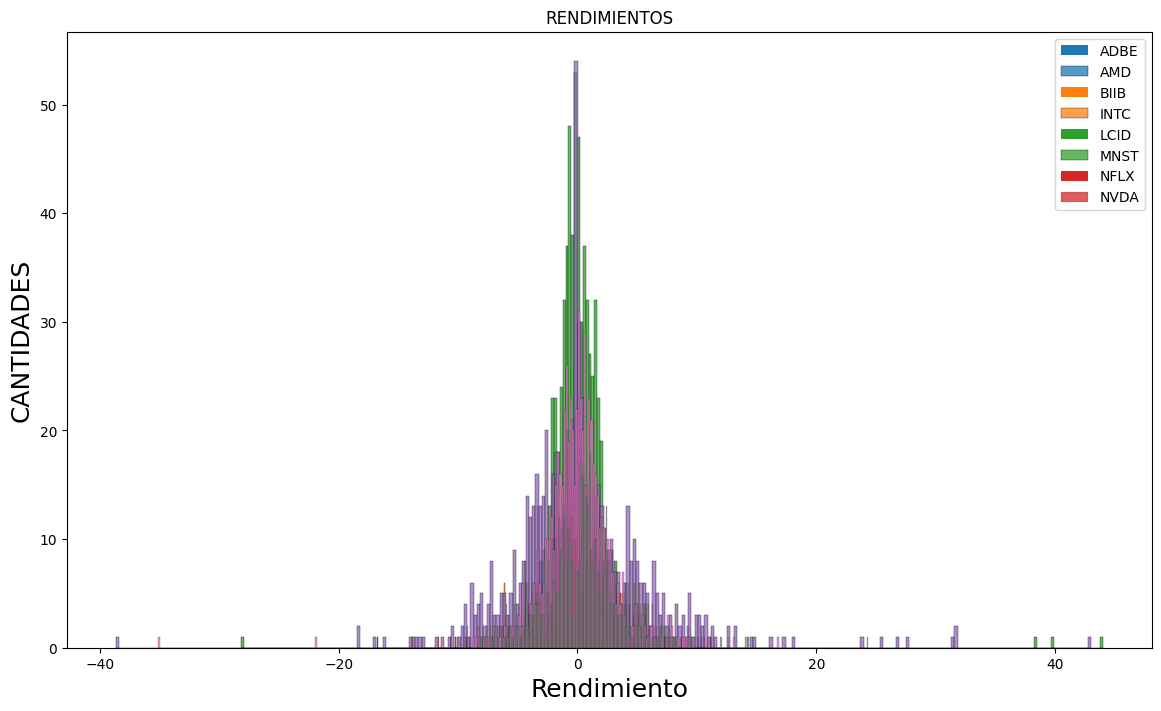

In [341]:
plt.figure(figsize=(14, 8))
for i in rendimiento.columns.values:
    #plt.hist(rendimiento[i]*100, label = i, bins=300)
    sns.histplot(rendimiento[i]*100, label=i, bins=300)
plt.title('RENDIMIENTOS')
plt.xlabel('Rendimiento', fontsize=18)
plt.ylabel('CANTIDADES', fontsize=18)
plt.legend(rendimiento.columns.values, loc='upper left')
plt.legend(rendimiento.columns.values)
#eliminamos los extremos con menos cantidad de datos.
#plt.xlim(-20,20)
plt.show()

### Matriz de covarianzas.
Valor que refleja en cómo varían dos variables de forma conjunta respecto a sus medias.

In [342]:
mCovarianza = rendimiento.cov(ddof=0, numeric_only=False)
cm = sns.light_palette("green", as_cmap=True)
mCovarianza.style.background_gradient(cmap=cm)

,ADBE,AMD,BIIB,INTC,LCID,MNST,NFLX,NVDA
ADBE,0.000545,0.000468,0.000210,0.000237,0.000391,0.000173,0.000366,0.000536
AMD,0.000468,0.001053,0.000223,0.000376,0.000676,0.000176,0.000455,0.000891
BIIB,0.000210,0.000223,0.001172,0.000137,0.000288,0.000126,0.000246,0.000261
INTC,0.000237,0.000376,0.000137,0.000517,0.000310,0.000124,0.000251,0.000379
LCID,0.000391,0.000676,0.000288,0.000310,0.003707,0.000172,0.000464,0.000661
MNST,0.000173,0.000176,0.000126,0.000124,0.000172,0.000232,0.000133,0.000220
NFLX,0.000366,0.000455,0.000246,0.000251,0.000464,0.000133,0.001015,0.000514
NVDA,0.000536,0.000891,0.000261,0.000379,0.000661,0.000220,0.000514,0.001167


### Carga de pruebas de WEIGHT, Rendimiento y riesgo del portafolio

#### Se definen 3 arrays
- PesosPortafolio = pesos randoms con cantidad de elementos igual al numero de activos.
- rportafolio = Rendimiento del portafolio
- sdPortafolio = desvio standard, o riesgo del portafolio

In [343]:
pesosPortafolio = []
rPortafolio = []
sdPortafolio = []

#guardamos la cantidad de activos que tenemos para el análisis.
nrosActivos = len(rendimiento.columns)
nrosActivos

8

In [344]:
for x in range(5000):
    pesos = np.random.random(len(rendimiento.columns)) # Arreglo de 1 x la cantidad de activos
    # Dividir por la suma total de los números
    pesos /= np.sum(pesos)
    # Agrega cada prueba a la matriz
    pesosPortafolio.append(pesos)

    # Retorno la "sumaProducto" o el producto de la matriz
    # con los porcentajes de inversion X el rendimiento de cada activo
    rPortafolio.append(np.dot(rendimiento.mean(), pesos)) # rendimiento.mean() = matriz de 7X1

    # np.dot(mCovarianzas, pesos)  retorna matriz 1X7 de multiplicar los
    # pesos(porcentaje a invertir) y la matriz de covarianzas
    # A esa matriz de 1X7 de varianzas, la vuelvo a multiplicar por pesos.T
    # eso nos devuelve un solo resultado, la varianza de la inversion y
    # posteriormente el STD
    sdPortafolio.append(np.sqrt(
        np.dot(pesos.T, np.dot(mCovarianza, pesos))
    ))

#### Ejemplo
Para la primera distribución de la inversión en % en los 7 activos:

In [345]:
for i in range(len(pesosPortafolio[0])):
    print(rendimiento.columns[i],' -> ', round(pesosPortafolio[0][i]*100,2), '%')

ADBE  ->  4.27 %
AMD  ->  1.15 %
BIIB  ->  16.4 %
INTC  ->  12.1 %
LCID  ->  13.94 %
MNST  ->  23.63 %
NFLX  ->  4.91 %
NVDA  ->  23.6 %


Va a tener el siguiente rendimiento:

In [346]:
str(round(rPortafolio[0], 5)*100) + ' %'

'0.097 %'

Tiene el siguiente riesgo (%):

In [347]:
str(round(sdPortafolio[0], 3)*100) + ' %'

'2.1 %'

###Generación de diccionarios
A partir de estas 3 variables, vamos a buscar minimizar el riesgo y maximizar el retorno
Generamos un diccionario de listas -> lista de rendimiento, riesgo y una lista para cada acción con sus porcentajes de inversión

In [348]:
diccionario = {'Rendimiento': rPortafolio, 'Riesgo': sdPortafolio}
for i, accion in enumerate(rendimiento.columns.tolist()):
    diccionario['USD ' + accion] = [w[i] for w in pesosPortafolio]

Generamos un DataFrame a partir del diccionario para tener las inversiones, riesgo y rendimiento en una sola linea

In [349]:
matrizPortafolio = pd.DataFrame(diccionario)
matrizPortafolio

,Rendimiento,Riesgo,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
0,0.000972,0.020608,0.042671,0.011547,0.164005,0.120991,0.139358,0.236344,0.049094,0.235990
1,0.000684,0.022513,0.055317,0.159444,0.012887,0.218193,0.183624,0.149889,0.136688,0.083959
2,0.001021,0.024222,0.272480,0.023063,0.004434,0.004972,0.215386,0.190070,0.059891,0.229705
3,0.000803,0.018171,0.100895,0.025207,0.157622,0.148256,0.008726,0.249814,0.117528,0.191952
4,0.000585,0.019541,0.185774,0.020074,0.050183,0.137554,0.130491,0.218334,0.194164,0.063426
...,...,...,...,...,...,...,...,...,...,...
4995,0.000615,0.021198,0.126482,0.156907,0.121589,0.177503,0.129257,0.073937,0.157029,0.057296
4996,0.000849,0.022951,0.064975,0.101600,0.176573,0.020596,0.187025,0.140585,0.195485,0.113161
4997,0.000937,0.021988,0.169042,0.171267,0.147450,0.052357,0.078477,0.078939,0.112933,0.189535
4998,0.000625,0.019637,0.205526,0.199086,0.059472,0.172354,0.013917,0.137688,0.134605,0.077353


## Frontera Eficiente
A continuación tenemos todas las carteras posibles con sus Riesgos y Rendimientos.

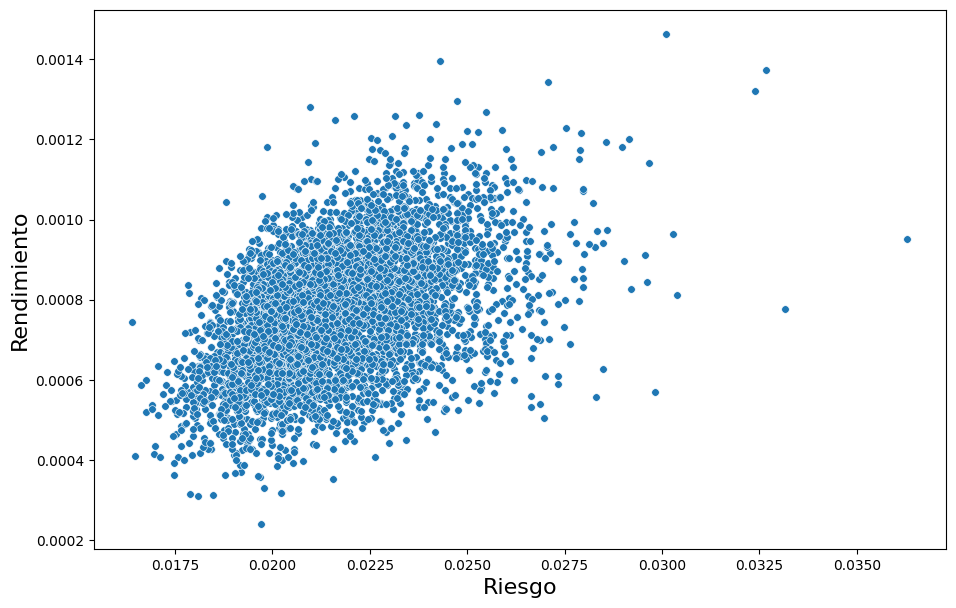

In [350]:
plt.figure(figsize=(11,7))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
plt.xlabel('Riesgo', fontsize=16)
plt.ylabel('Rendimiento', fontsize=16)
plt.show()

# ANÁLISIS

### Mínima Varianza
Buscamos el menor riesgo. Las carteras eficientes en las cuales deberíamos invertir, debe tener riesgo mayor a la mínima varianza, pero siempre mayor rendimiento.
En el siguiente gráfico están ubicadas por encima de la línea punteada.

In [351]:
minimaVarianza = matrizPortafolio.iloc[matrizPortafolio['Riesgo'].idxmin()]
display(minimaVarianza)
display(minimaVarianza.loc["Rendimiento"]*100)

Rendimiento    0.000744
Riesgo         0.016403
USD ADBE       0.073756
USD AMD        0.131359
USD BIIB       0.048496
USD INTC       0.044343
USD LCID       0.059901
USD MNST       0.537334
USD NFLX       0.061057
USD NVDA       0.043754
Name: 4308, dtype: float64

0.07437063252170598

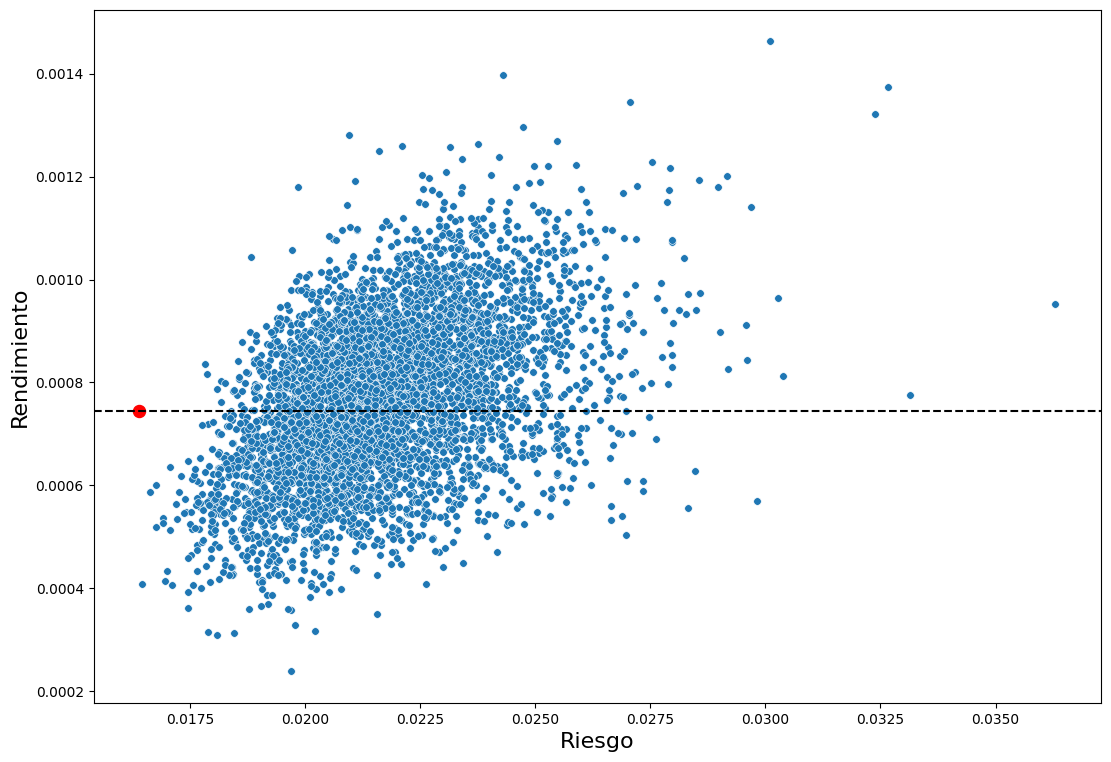

In [352]:
plt.figure(figsize=(13,9))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='.', s=300)
plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
plt.xlabel('Riesgo', fontsize=16)
plt.ylabel('Rendimiento', fontsize=16)
plt.show()

### Mayor rendimiento
Buscamos la inversión con mayor rendimiento de las pruebas.
A partir de este punto, todos los que se encuetran a la derecha de la línea punteada, serán irrelevantes porque tienene menor rendimiento y mayor riesgo.


In [353]:
mayorRendimiento = matrizPortafolio.loc[matrizPortafolio['Rendimiento'].idxmax()]
mayorRendimiento

Rendimiento    0.001463
Riesgo         0.030100
USD ADBE       0.016438
USD AMD        0.073517
USD BIIB       0.126561
USD INTC       0.013114
USD LCID       0.295857
USD MNST       0.037442
USD NFLX       0.018019
USD NVDA       0.419051
Name: 259, dtype: float64

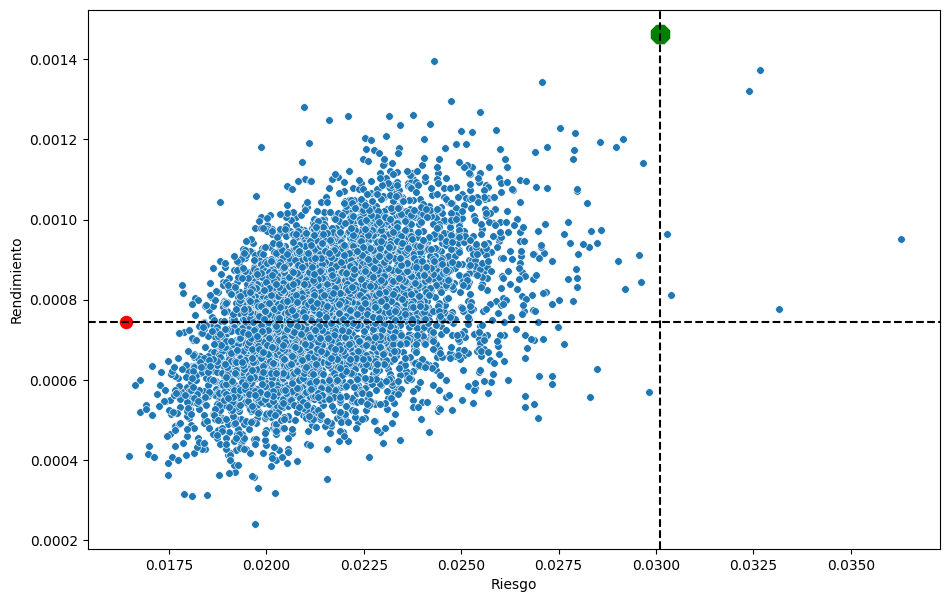

In [354]:
'''matrizPortafolio.plot(x='Riesgo',y='Rendimiento', kind='scatter', figsize=(13,9) )
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='*', s=300)
plt.scatter(x=optimo[1], y=optimo[0], color='green', marker='*', s=300)
plt.savefig('FronteraEficiente', dpi=200)'''


plt.figure(figsize=(11,7))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
plt.scatter(x=mayorRendimiento[1], y=mayorRendimiento[0], color='green', marker='8', s=200)
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='.', s=300)
plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
plt.axvline(x=mayorRendimiento[1], color='black', linestyle='--')
plt.show()

### Cuadrante óptimo
Selección de los portafolios óptimos cuadrante superior izquierdo

In [355]:
m = matrizPortafolio
m = m[(m["Rendimiento"] >= minimaVarianza[0]) & (m["Riesgo"] <= mayorRendimiento[1])]

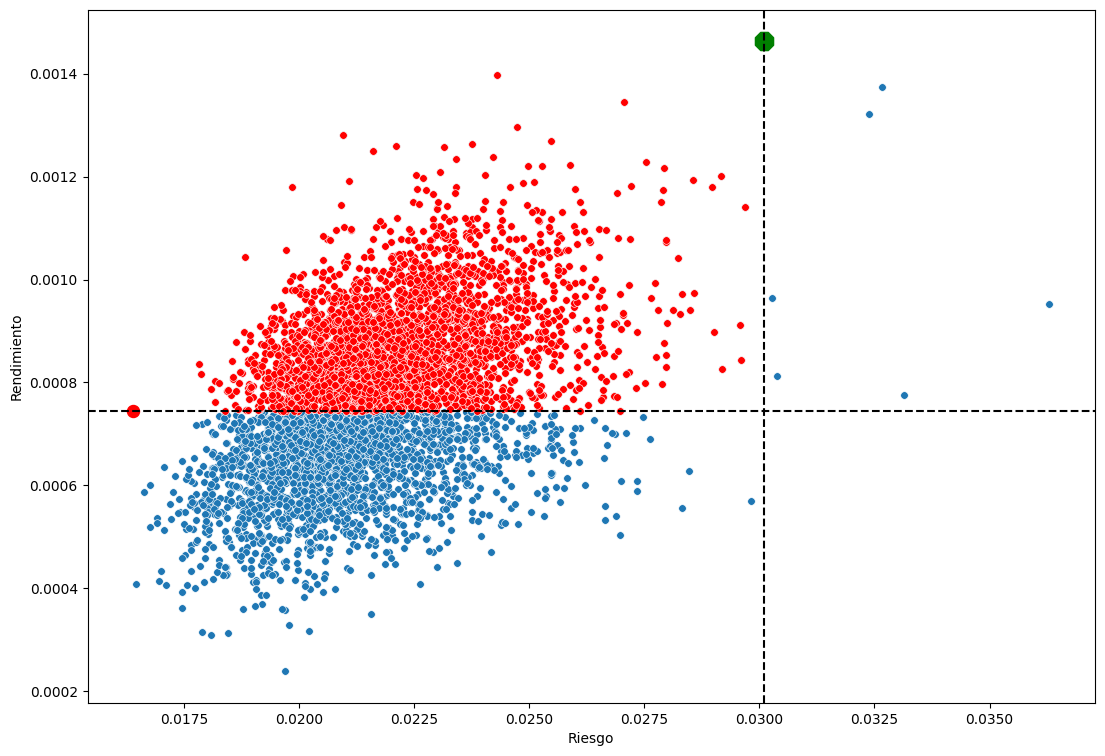

In [356]:
plt.figure(figsize=(13,9))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
sns.scatterplot(data=m, x = 'Riesgo', y='Rendimiento', color="red", s=30)
plt.scatter(x=mayorRendimiento[1], y=mayorRendimiento[0], color='green', marker='8', s=200)
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='.', s=300)
plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
plt.axvline(x=mayorRendimiento[1], color='black', linestyle='--')
plt.show()

### Pendiente óptima

In [357]:
minimaVarianza

Rendimiento    0.000744
Riesgo         0.016403
USD ADBE       0.073756
USD AMD        0.131359
USD BIIB       0.048496
USD INTC       0.044343
USD LCID       0.059901
USD MNST       0.537334
USD NFLX       0.061057
USD NVDA       0.043754
Name: 4308, dtype: float64

In [358]:
# Encontrar la pendiente de la línea recta que cruza los dos puntos.
x1, y1 = minimaVarianza['Riesgo'], minimaVarianza['Rendimiento']
x2, y2 = mayorRendimiento['Riesgo'], mayorRendimiento['Rendimiento']
pendiente = (y2 - y1) / (x2 - x1)
print("Pendiente: ", pendiente)
b = y1 - pendiente * x1
print("Punto de corte", b)


Pendiente:  0.05250543789017333
Punto de corte -0.00011754417131961802


In [359]:
pendiente_optima = pd.DataFrame(columns = m.columns)
for index, row in m.iterrows():
    if row['Rendimiento'] >= pendiente * row['Riesgo'] + b:
       pendiente_optima = pendiente_optima.append(row)

pendiente_optima.reset_index(drop=True, inplace=True) ;

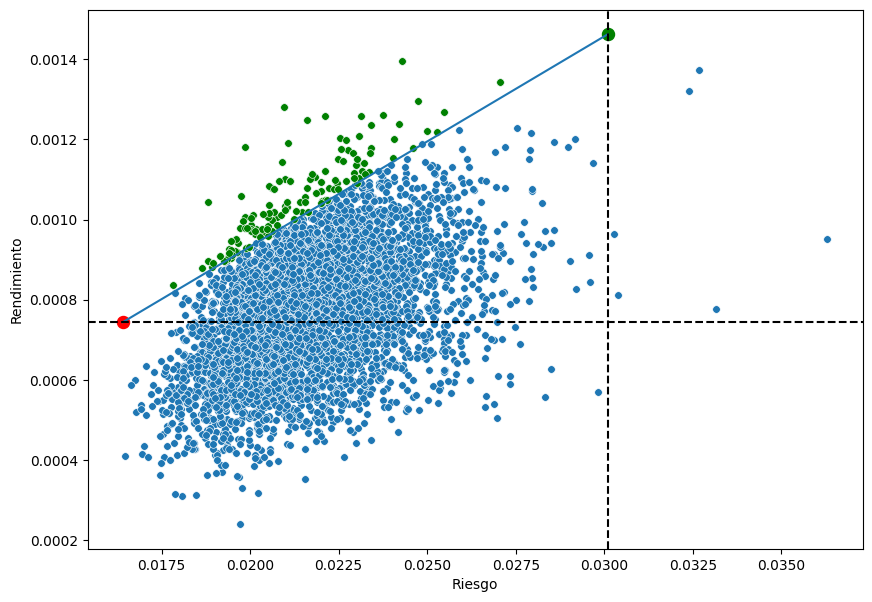

In [360]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
sns.scatterplot(data=pendiente_optima, x = 'Riesgo', y='Rendimiento', color="green", s=30)


# Puntos de menor riesgo(rojo) y mayor retorno(Verde)
plt.scatter(x=mayorRendimiento[1], y=mayorRendimiento[0], color='green', marker='.', s=300)
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='.', s=300)

plt.plot([mayorRendimiento[1], minimaVarianza[1]], [mayorRendimiento[0], minimaVarianza[0]])


plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
plt.axvline(x=mayorRendimiento[1], color='black', linestyle='--')
plt.show()

### Definición de carteras según perfil de riesgo del inversor

 Borramos las carteras que no vamos a tomar

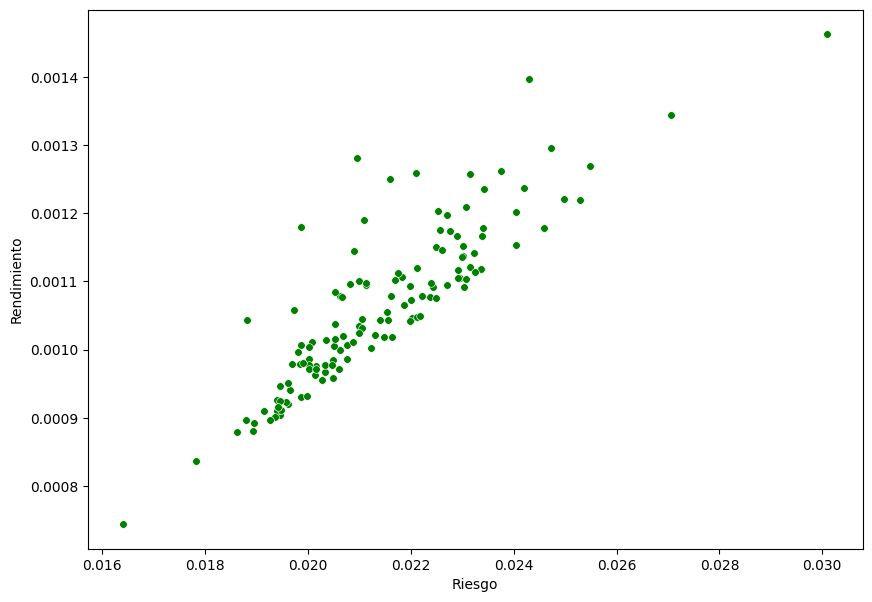

In [361]:
plt.figure(figsize=(10,7))
sns.scatterplot(data= pendiente_optima, x = 'Riesgo', y='Rendimiento',color='green', s=30)

#plt.plot([mayorRendimiento[1], minimaVarianza[1]], [mayorRendimiento[0], minimaVarianza[0]])
#plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
#plt.axvline(x=mayorRendimiento[1], color='black', linestyle='--')
plt.show()

#### Definir los 3 perfiles
Dividir en 3 sectores del gráfico según perfil del riesgo

In [362]:
division = (pendiente_optima['Riesgo'].max()  - pendiente_optima['Riesgo'].min()) / 3
division
bajo = pendiente_optima['Riesgo'].min() + division
medio = bajo + division

In [363]:
# Perfil Bajo
perfil_bajo = pendiente_optima[(pendiente_optima["Riesgo"] >= pendiente_optima["Riesgo"].min()) &
                 (pendiente_optima["Riesgo"] <= bajo)]
maximo_perfil_bajo = perfil_bajo.loc[perfil_bajo['Rendimiento'].idxmax()]
maximo_perfil_bajo_copy = maximo_perfil_bajo.copy()
maximo_perfil_bajo_mensual = maximo_perfil_bajo.copy()
print(f"Máximo rendimiento para perfil bajo: \n {maximo_perfil_bajo} \n ---------------")

# Perfil Medio
perfil_medio = pendiente_optima[(pendiente_optima["Riesgo"] >= bajo) &
                 (pendiente_optima["Riesgo"] <= medio)]
maximo_perfil_medio = perfil_medio.loc[perfil_medio['Rendimiento'].idxmax()]
maximo_perfil_medio_copy = maximo_perfil_medio.copy()
maximo_perfil_medio_mensual = maximo_perfil_medio.copy()
print(f"Máximo rendimiento para perfil Medio: \n {maximo_perfil_medio} \n ---------------")

# Perfil Alto
perfil_alto = pendiente_optima[pendiente_optima["Riesgo"] >= medio]
maximo_perfil_alto = perfil_alto.loc[perfil_alto['Rendimiento'].idxmax()]
maximo_perfil_alto_copy = maximo_perfil_alto.copy()
maximo_perfil_alto_mensual = maximo_perfil_alto.copy()
print(f"Máximo rendimiento para perfil Alto: \n {maximo_perfil_alto} \n ---------------")

Máximo rendimiento para perfil bajo: 
 Rendimiento    0.001281
Riesgo         0.020962
USD ADBE       0.025834
USD AMD        0.131636
USD BIIB       0.091256
USD INTC       0.030850
USD LCID       0.026047
USD MNST       0.329420
USD NFLX       0.017614
USD NVDA       0.347342
Name: 111, dtype: float64 
 ---------------
Máximo rendimiento para perfil Medio: 
 Rendimiento    0.001397
Riesgo         0.024299
USD ADBE       0.094188
USD AMD        0.054697
USD BIIB       0.100519
USD INTC       0.001233
USD LCID       0.008014
USD MNST       0.099592
USD NFLX       0.175888
USD NVDA       0.465869
Name: 18, dtype: float64 
 ---------------
Máximo rendimiento para perfil Alto: 
 Rendimiento    0.001463
Riesgo         0.030100
USD ADBE       0.016438
USD AMD        0.073517
USD BIIB       0.126561
USD INTC       0.013114
USD LCID       0.295857
USD MNST       0.037442
USD NFLX       0.018019
USD NVDA       0.419051
Name: 8, dtype: float64 
 ---------------


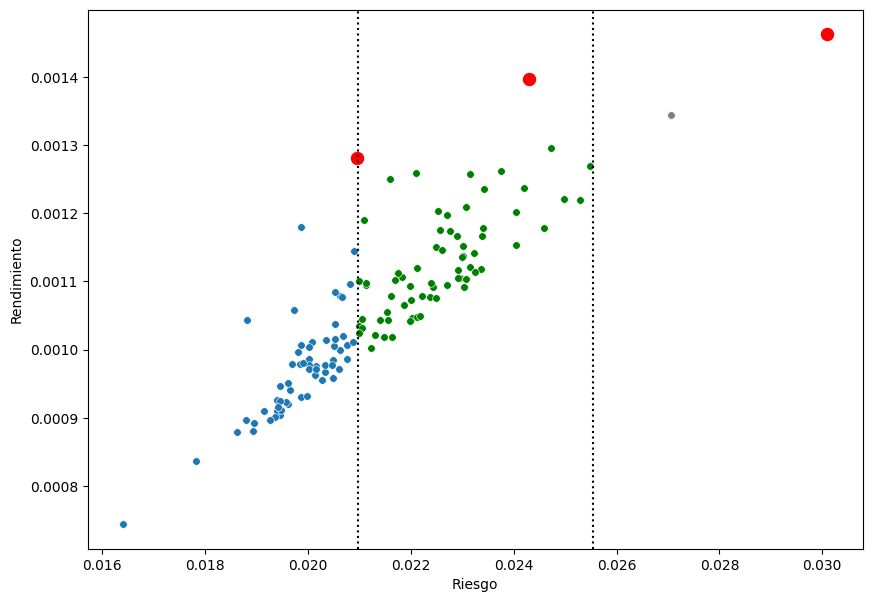

In [364]:
plt.figure(figsize=(10,7))

sns.scatterplot(data= perfil_bajo, x = 'Riesgo', y='Rendimiento', s=30)
sns.scatterplot(data= perfil_medio, x = 'Riesgo', y='Rendimiento', color='green', s=30)
sns.scatterplot(data= perfil_alto, x = 'Riesgo', y='Rendimiento', color='grey', s=30)

# Lineas verticales
plt.axvline(x=bajo, color='black', linestyle=':')
plt.axvline(x=medio, color='black', linestyle=':')

# Puntos máximos por perfil
plt.scatter(x=maximo_perfil_bajo[1], y=maximo_perfil_bajo[0], color='red', marker='.', s=300)
plt.scatter(x=maximo_perfil_medio[1], y=maximo_perfil_medio[0], color='red', marker='.', s=300)
plt.scatter(x=maximo_perfil_alto[1], y=maximo_perfil_alto[0], color='red', marker='.', s=300)

plt.show()

In [365]:
maximo_perfil_bajo = pd.DataFrame(maximo_perfil_bajo)
column_name = maximo_perfil_bajo.columns[0]
maximo_perfil_bajo.rename(columns={column_name: "Total %"}, inplace=True)
maximo_perfil_bajo['Total %'] = round(maximo_perfil_bajo['Total %'] * 100,2)
maximo_perfil_bajo['Total %'] = maximo_perfil_bajo['Total %'].astype(str) + " %"



In [366]:
maximo_perfil_medio = pd.DataFrame(maximo_perfil_medio)
column_name = maximo_perfil_medio.columns[0]
maximo_perfil_medio.rename(columns={column_name: "Total %"}, inplace=True)
maximo_perfil_medio['Total %'] = round(maximo_perfil_medio['Total %'] * 100,2)
maximo_perfil_medio['Total %'] = maximo_perfil_medio['Total %'].astype(str) + " %"


In [367]:
maximo_perfil_alto = pd.DataFrame(maximo_perfil_alto)
column_name = maximo_perfil_alto.columns[0]
maximo_perfil_alto.rename(columns={column_name: "Total %"}, inplace=True)
maximo_perfil_alto['Total %'] = round(maximo_perfil_alto['Total %'] * 100,2)
maximo_perfil_alto['Total %'] = maximo_perfil_alto['Total %'].astype(str) + " %"

In [368]:
print(f'\n--------------------------------------------------------\nA continuación el rendimiento DIARIO de cada cartera:\n--------------------------------------------------------\n')
print("INVERSIÓN TOTAL PARA PERFIL BAJO: \n")
display(maximo_perfil_bajo.T)
print("\nINVERSIÓN TOTAL PARA PERFIL MEDIO: \n")
display(maximo_perfil_medio.T)
print("\nINVERSIÓN TOTAL PARA PERFIL ALTO: \n")
display(maximo_perfil_alto.T)


--------------------------------------------------------
A continuación el rendimiento DIARIO de cada cartera:
--------------------------------------------------------

INVERSIÓN TOTAL PARA PERFIL BAJO: 



,Rendimiento,Riesgo,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
Total %,0.13 %,2.1 %,2.58 %,13.16 %,9.13 %,3.09 %,2.6 %,32.94 %,1.76 %,34.73 %



INVERSIÓN TOTAL PARA PERFIL MEDIO: 



,Rendimiento,Riesgo,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
Total %,0.14 %,2.43 %,9.42 %,5.47 %,10.05 %,0.12 %,0.8 %,9.96 %,17.59 %,46.59 %



INVERSIÓN TOTAL PARA PERFIL ALTO: 



,Rendimiento,Riesgo,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
Total %,0.15 %,3.01 %,1.64 %,7.35 %,12.66 %,1.31 %,29.59 %,3.74 %,1.8 %,41.91 %


In [369]:
# Perfil Bajo Mensual

maximo_perfil_bajo_mensual = pd.DataFrame(maximo_perfil_bajo_mensual)

column_name = maximo_perfil_bajo_mensual.columns[0]
maximo_perfil_bajo_mensual.rename(columns={column_name: "Total %"}, inplace=True)

maximo_perfil_bajo_mensual = maximo_perfil_bajo_mensual.T


# Perfil Medio Mensual

maximo_perfil_medio_mensual = pd.DataFrame(maximo_perfil_medio_mensual)

column_name = maximo_perfil_medio_mensual.columns[0]
maximo_perfil_medio_mensual.rename(columns={column_name: "Total %"}, inplace=True)

maximo_perfil_medio_mensual = maximo_perfil_medio_mensual.T

# Perfil Alto Mensual

maximo_perfil_alto_mensual = pd.DataFrame(maximo_perfil_alto_mensual)

column_name = maximo_perfil_alto_mensual.columns[0]
maximo_perfil_alto_mensual.rename(columns={column_name: "Total %"}, inplace=True)

maximo_perfil_alto_mensual = maximo_perfil_alto_mensual.T

# Promedio de días de los meses en el año
dias_de_meses = 30.41

maximo_perfil_bajo_mensual['Rendimiento'] = ((1 + maximo_perfil_bajo_mensual['Rendimiento'] ) ** dias_de_meses - 1)
maximo_perfil_medio_mensual['Rendimiento'] = ((1 + maximo_perfil_medio_mensual['Rendimiento'] ) ** dias_de_meses - 1)
maximo_perfil_alto_mensual['Rendimiento'] = ((1 + maximo_perfil_alto_mensual['Rendimiento'] ) ** dias_de_meses - 1)

maximo_perfil_bajo_mensual.loc['Total %'] = maximo_perfil_bajo_mensual.loc['Total %'].apply(lambda x: "{:.2f}%".format(x * 100))
maximo_perfil_medio_mensual.loc['Total %'] = maximo_perfil_medio_mensual.loc['Total %'].apply(lambda x: "{:.2f}%".format(x * 100))
maximo_perfil_alto_mensual.loc['Total %'] = maximo_perfil_alto_mensual.loc['Total %'].apply(lambda x: "{:.2f}%".format(x * 100))



In [370]:
print(f'\n--------------------------------------------------------\nA continuación el rendimiento MENSUAL de cada cartera:\n--------------------------------------------------------\n')
print("INVERSIÓN TOTAL PARA PERFIL BAJO: \n")
display(maximo_perfil_bajo_mensual)
print("\nINVERSIÓN TOTAL PARA PERFIL MEDIO: \n")
display(maximo_perfil_medio_mensual)
print("\nINVERSIÓN TOTAL PARA PERFIL ALTO: \n")
display(maximo_perfil_alto_mensual)


--------------------------------------------------------
A continuación el rendimiento MENSUAL de cada cartera:
--------------------------------------------------------

INVERSIÓN TOTAL PARA PERFIL BAJO: 



,Rendimiento,Riesgo,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
Total %,3.97%,2.10%,2.58%,13.16%,9.13%,3.09%,2.60%,32.94%,1.76%,34.73%



INVERSIÓN TOTAL PARA PERFIL MEDIO: 



,Rendimiento,Riesgo,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
Total %,4.34%,2.43%,9.42%,5.47%,10.05%,0.12%,0.80%,9.96%,17.59%,46.59%



INVERSIÓN TOTAL PARA PERFIL ALTO: 



,Rendimiento,Riesgo,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
Total %,4.55%,3.01%,1.64%,7.35%,12.66%,1.31%,29.59%,3.74%,1.80%,41.91%


# MODELO PREDICTIVO


## Predicción y test

[*********************100%***********************]  1 of 1 completed
Error cuadrático medio para AMD: 2.6756063615914583


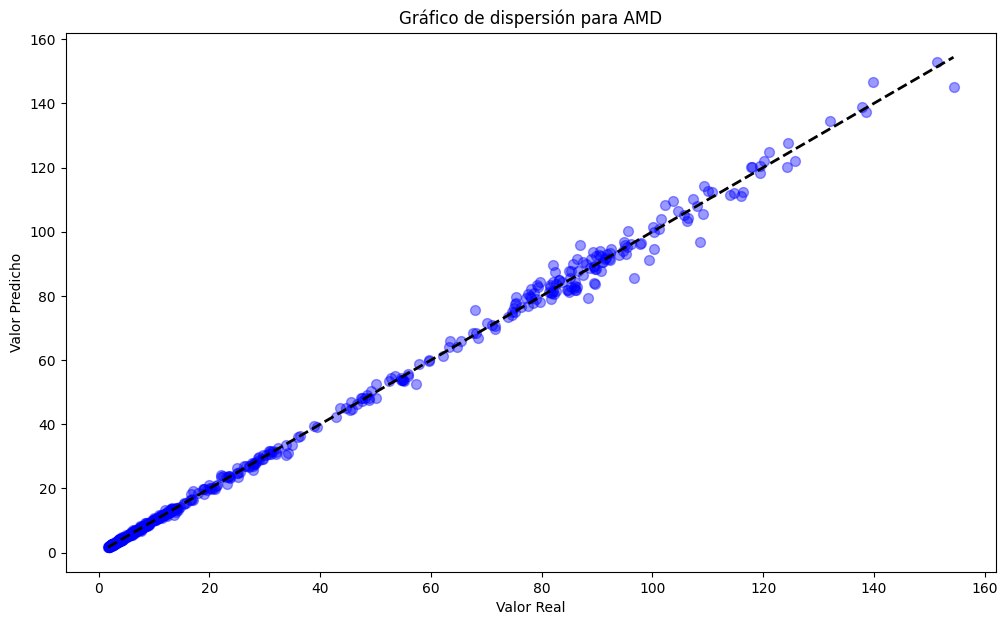

[*********************100%***********************]  1 of 1 completed
Error cuadrático medio para LCID: 4.50540144712858


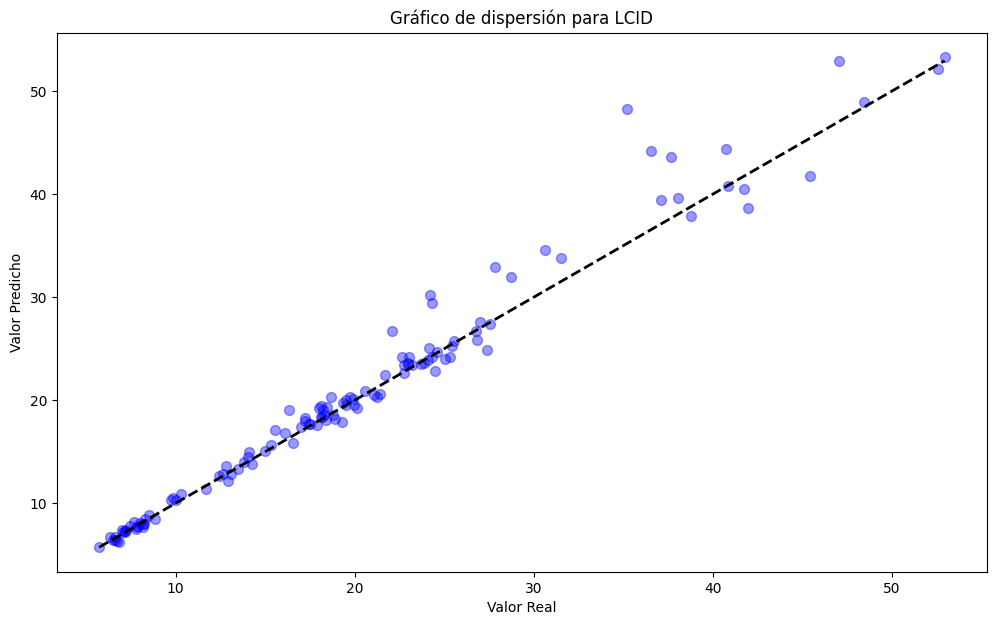

[*********************100%***********************]  1 of 1 completed
Error cuadrático medio para MNST: 0.26717081862744285


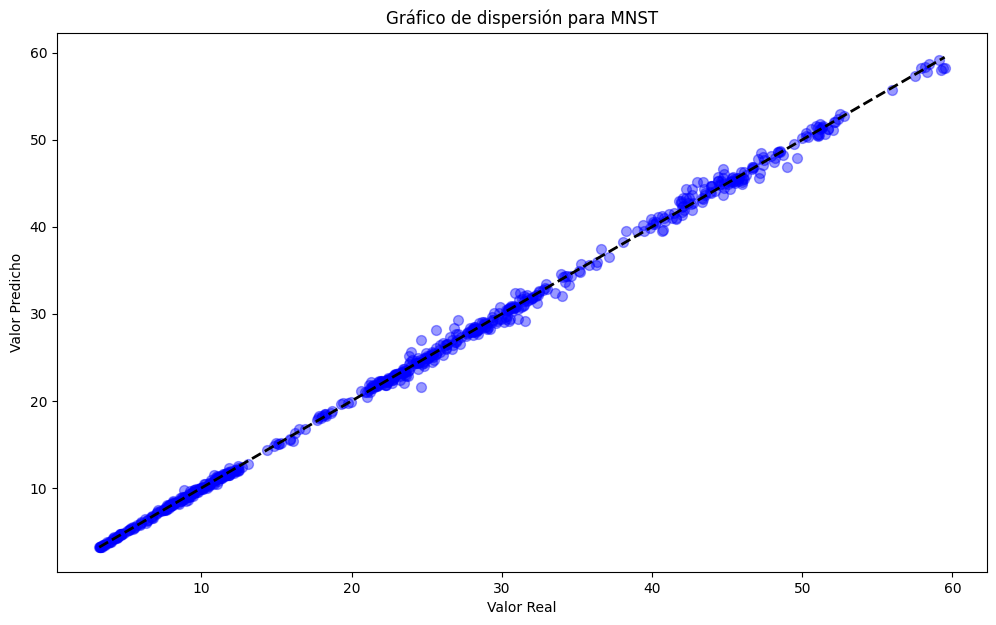

[*********************100%***********************]  1 of 1 completed
Error cuadrático medio para BIIB: 72.16648925070537


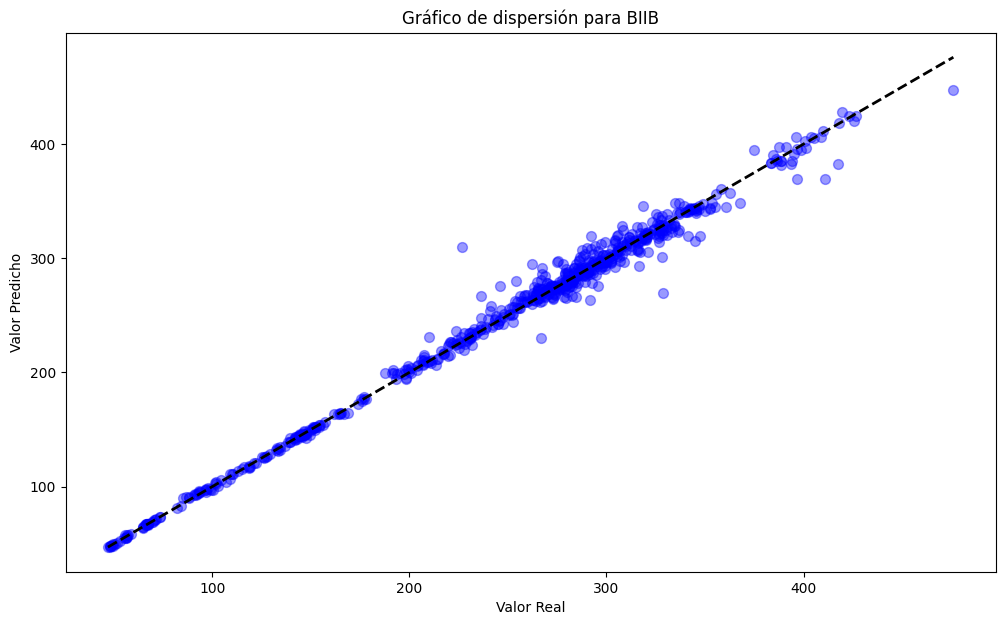

[*********************100%***********************]  1 of 1 completed
Error cuadrático medio para NVDA: 12.997667723985847


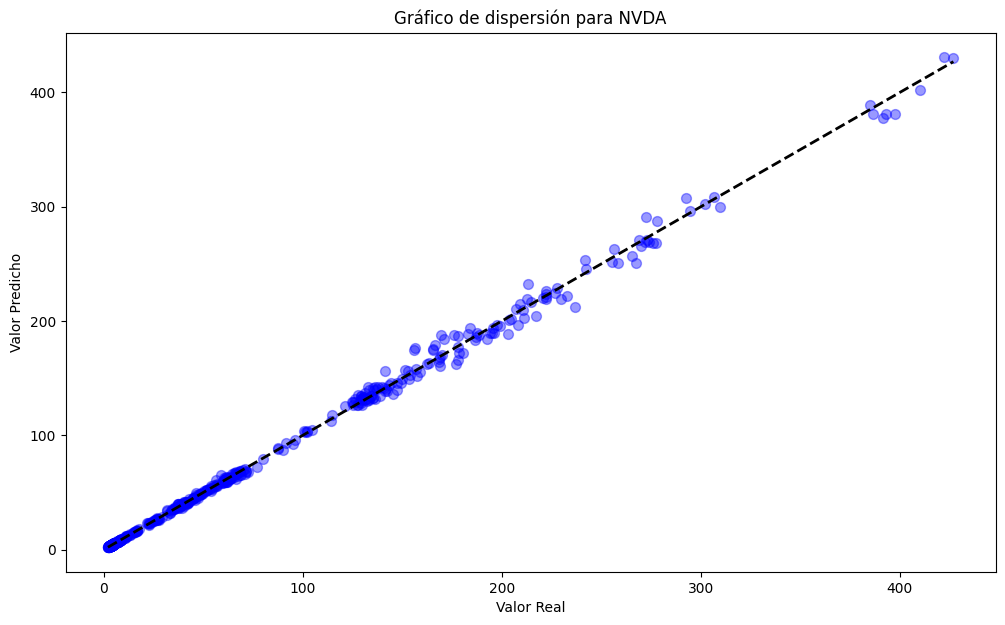

[*********************100%***********************]  1 of 1 completed
Error cuadrático medio para ADBE: 50.140141551002394


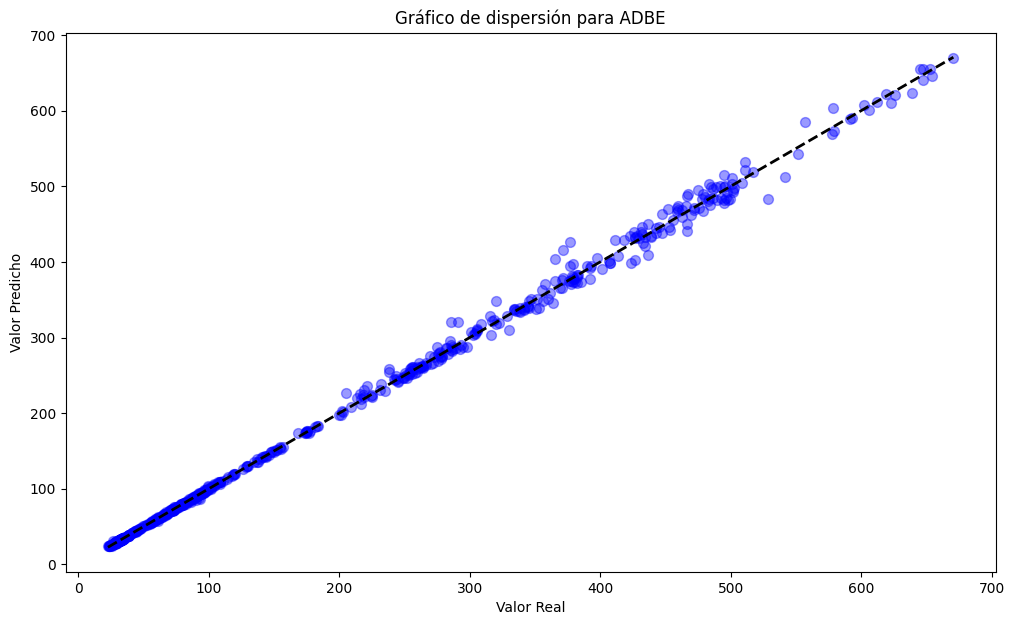

[*********************100%***********************]  1 of 1 completed
Error cuadrático medio para NFLX: 86.20506607445958


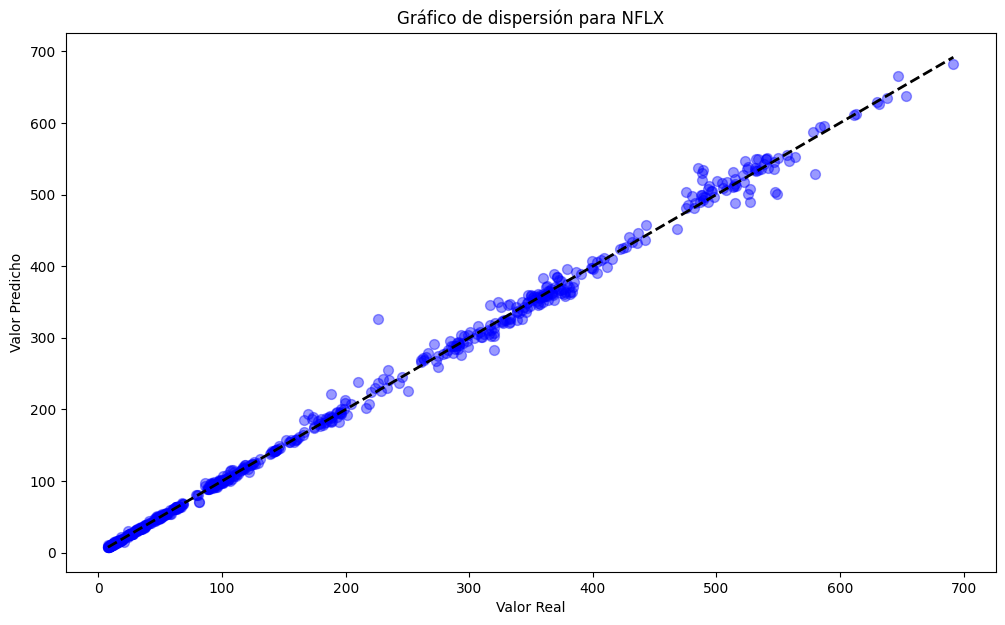

[*********************100%***********************]  1 of 1 completed
Error cuadrático medio para INTC: 0.9351415407869141


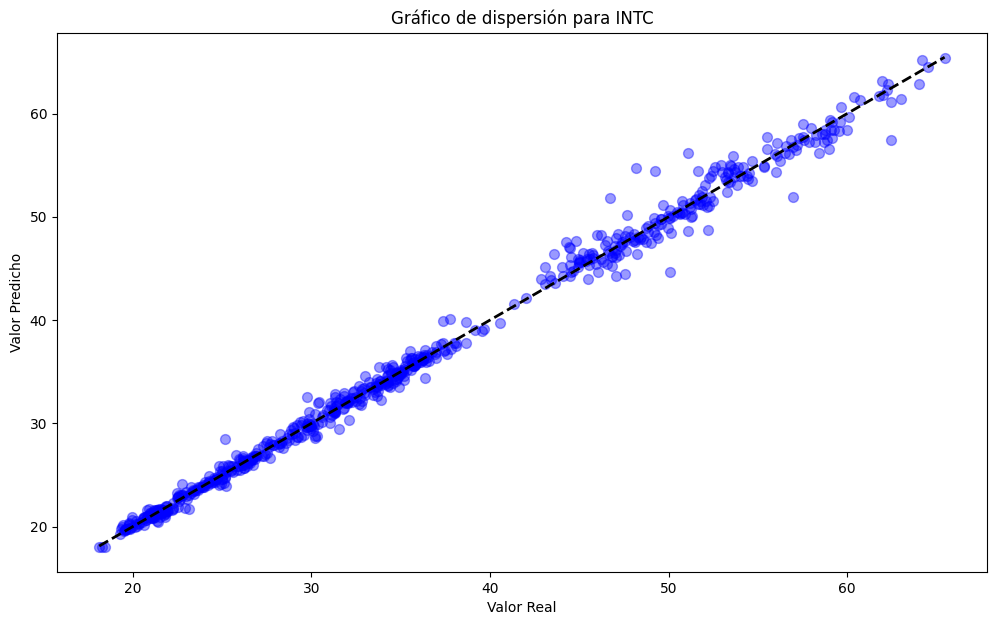

,Activo,error_cuadratico_medio
0,AMD,2.675606
1,LCID,4.505401
2,MNST,0.267171
3,BIIB,72.166489
4,NVDA,12.997668
5,ADBE,50.140142
6,NFLX,86.205066
7,INTC,0.935142


,Activo,Precio_Predicho
0,AMD,112.797998
1,LCID,5.692500
2,MNST,59.182599
3,BIIB,294.840201
4,NVDA,430.810801
5,ADBE,498.851901
6,NFLX,425.196609
7,INTC,34.541700


In [371]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

errores_cuadraticos = pd.DataFrame(columns=['Activo', 'error_cuadratico_medio'])
predictions_df = pd.DataFrame(columns=['Activo', 'Precio_Predicho'])

for activo in activos:

    # Descargar los datos históricos del activo utilizando yfinance
    ''' Tomamos un set de datos mayor al anterior análisis, ya que esto
    ayuda al modelo a ser entrenado
    '''
    data = yf.download(activo, start='2010-01-01', end=today)

    # Calcular características técnicas adicionales
    ''' crea una ventana deslizante de tamaño 10, 30, 60, 100,
    lo que significa, que por ejemplo, se calcula la media de los
    últimos 30 períodos SMA_30 (en este caso, 30 días) de datos.
    '''
    data['SMA_10'] = data['Close'].rolling(window=10).mean()
    data['SMA_30'] = data['Close'].rolling(window=30).mean()
    data['SMA_60'] = data['Close'].rolling(window=60).mean()
    data['SMA_100'] = data['Close'].rolling(window=100).mean()

    # Eliminar filas con valores faltantes
    data.dropna(inplace=True)

    # Seleccionar características y objetivo
    features = ['SMA_10', 'SMA_30', 'SMA_60', 'SMA_100']
    target = 'Close'

    '''
    Se asignan las X e Y de los train y tests.
    En el test_size=0.2 : Usamos el 80% de los datos
    para el entrenamiento y 20% de los datos para el test
    '''
    X = data[features].values
    y = data[target].values

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Entrenar un modelo de árbol de decisión
    regressor = RandomForestRegressor(n_estimators=100, random_state=0)
    regressor.fit(X_train, y_train)

    # Predecir los precios de las acciones utilizando los datos de prueba
    y_pred = regressor.predict(X_test)

    # Evaluar la precisión del modelo utilizando el error cuadrático medio (MSE)
    mse = mean_squared_error(y_test, y_pred)
    errores_cuadraticos = errores_cuadraticos.append({'Activo': activo, 'error_cuadratico_medio': mse}, ignore_index=True)
    print(f"Error cuadrático medio para {activo}: {mse}")

    plt.figure(figsize=(12,7))
    plt.scatter(y_test, y_pred, color='blue', marker='.', alpha=0.4, s=200)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Valor Real')
    plt.ylabel('Valor Predicho')
    plt.title(f"Gráfico de dispersión para {activo}")
    plt.show()

    # Obtener los datos de características técnicas para la última fecha disponible
    last_date = data.index[-1]
    next_month = last_date + timedelta(days=30)
    next_month_data = data.loc[last_date][features].values.reshape(1, -1)

    # Predecir el precio de la acción para el mes siguiente
    next_month_price = regressor.predict(next_month_data)

     # Agregar el precio predicho y el nombre del activo al DataFrame
    predictions_df = predictions_df.append({'Activo': activo, 'Precio_Predicho': next_month_price[0]}, ignore_index=True)

display(errores_cuadraticos)
display(predictions_df)

## Comparación y rendimiento con periodo actual y futuro

In [372]:
periodo_actual = pd.DataFrame(dataSet.iloc[-1])
periodo_actual.rename(columns={periodo_actual.columns[0]:'Periodo_Actual'}, inplace=True)

predictions_df.set_index('Activo', inplace=True)
predictions_df = predictions_df.merge(periodo_actual, left_index=True, right_index=True)

# Sacamos el rendimiento entre lo actual y la predicción
predictions_df["% R"] = (predictions_df['Precio_Predicho'] - predictions_df['Periodo_Actual']) / predictions_df['Periodo_Actual'] * 100

In [373]:
predictions_df

,Precio_Predicho,Periodo_Actual,% R
AMD,112.797998,110.010002,2.534312
LCID,5.692500,5.470000,4.067644
MNST,59.182599,59.110001,0.122819
BIIB,294.840201,284.519989,3.627236
NVDA,430.810801,422.089996,2.066101
ADBE,498.851901,484.720001,2.915477
NFLX,425.196609,424.019989,0.277492
INTC,34.541700,33.000000,4.671819


In [383]:
np.dot(rendimiento.mean(), pesos)

0.0005564739257430274

In [386]:
np.array(predictions_df["Precio_Predicho"])

array([112.79799843,   5.69249991,  59.18259907, 294.8402005 ,
       430.81080109, 498.85190125, 425.19660889,  34.54170029])

In [389]:
np.dot(maximo_perfil_bajo_copy[2:], np.array(predictions_df["Precio_Predicho"]))

213.20041496026687

In [376]:
'''from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Definir la lista de acciones
activos = ["AMD", "LCID", "MNST", "BIIB", "NVDA"]

# Obtener los datos históricos de las acciones
data = yf.download(activos, start="2020-01-01", end="2022-12-31")["Adj Close"]

# Calcular los rendimientos diarios
returns = data.pct_change()

# Eliminar la primera fila (NaN) de los rendimientos
returns = returns.dropna()

# Definir la columna de predicción
target_column = "LCID"

# Dividir los datos en conjunto de entrenamiento y prueba
X = returns.drop(target_column, axis=1)
y = returns[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones para el próximo mes
next_month_data = yf.download(activos, start="2022-12-01", end="2022-12-31")["Adj Close"]
next_month_returns = next_month_data.pct_change().dropna()
next_month_features = next_month_returns.drop(target_column, axis=1)
print(next_month_features)
next_month_predictions = model.predict(next_month_features.iloc[:, :4].values)

# Imprimir las predicciones
print("Predicción de precio para el próximo mes:")
print(f"{target_column}: {next_month_predictions[0]}")

# Evaluar el rendimiento del modelo en el conjunto de prueba
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio en el conjunto de prueba:", mse)'''

'from sklearn.model_selection import train_test_split\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.metrics import mean_squared_error\n\n# Definir la lista de acciones\nactivos = ["AMD", "LCID", "MNST", "BIIB", "NVDA"]\n\n# Obtener los datos históricos de las acciones\ndata = yf.download(activos, start="2020-01-01", end="2022-12-31")["Adj Close"]\n\n# Calcular los rendimientos diarios\nreturns = data.pct_change()\n\n# Eliminar la primera fila (NaN) de los rendimientos\nreturns = returns.dropna()\n\n# Definir la columna de predicción\ntarget_column = "LCID"\n\n# Dividir los datos en conjunto de entrenamiento y prueba\nX = returns.drop(target_column, axis=1)\ny = returns[target_column]\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Crear el modelo de regresión lineal\nmodel = LinearRegression()\n\n# Entrenar el modelo\nmodel.fit(X_train, y_train)\n\n# Realizar predicciones para el próximo mes\nnext_month_data = yf.downlo